<a href="https://colab.research.google.com/github/chetan7116desai/TEAM_A_data606/blob/main/Data_Cleansing/2_3HEPATITIS_Datacleaning%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Vaccine Efficiency Prediction using machine learning techniques**


In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

In [ ]:
df_vax = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")
df_vax.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_symp = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")
df_symp.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_data = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")
df_data.drop('Unnamed: 0',axis=1,inplace=True)


## Common Functions

In [ ]:
def sanitycheck(df):
    """
    Generates Unique count, Null Count and Null Percentage for each column in Dataframe
    
    Parameters
    ---------
    Input pandas dataframe
    
    Output: pandas dataframe
    """
    data = []
    for col in df.columns:
        data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
    return pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

In [ ]:
def binaryconvert(df,cols):
    """
    Converts categorical value with Y and N to binary 0's and 1's    
    Parameters
    ---------
    Input pandas dataframe and column names
    
    Output: pandas dataframe
    """
    for col in cols:
      df[col] = np.where(df[col] == "Y", 1, 0)


In [ ]:
def regex_clean(text):
            
    # Remove special terms    
    text = re.sub(pattern='#x200B;|&lt;|&gt;|&amp;|_', repl=' ', string=str(text))  
    
    # Remove all digits
    text = re.sub(pattern=r'\d+', repl=' ', string=str(text))
    #text = re.sub(pattern=r'\w*\d\w*', repl='', string=text)
    
    # Remove non-english symbols
    text = re.sub(pattern=r'[^a-zA-Z1-9]+', repl=' ', string=str(text))
  
    return text

## HEPATITIS Vaccine Data Exploration

### HEPATITIS VAERS vaccine data

In [ ]:
# Filtering onlyHEPATITIS Vaccine info
df_Hep_vax =  df_vax[(df_vax['VAX_TYPE'] =='HEP') | (df_vax['VAX_TYPE'] =='HEPA') | (df_vax['VAX_TYPE'] =='HEPAB') | (df_vax['VAX_TYPE'] =='HEPATYP')]
print(df_Hep_vax["VAERS_ID"].nunique())

113692


In [ ]:
vaers_hep = df_data.merge(df_Hep_vax, on='VAERS_ID',how='right').merge(df_symp, on='VAERS_ID',how='inner')


In [ ]:
print(vaers_hep["VAERS_ID"].nunique())

113670


In [ ]:
vaers_hep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148408 entries, 0 to 148407
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         148408 non-null  int64  
 1   RECVDATE         148408 non-null  object 
 2   STATE            138000 non-null  object 
 3   AGE_YRS          121618 non-null  float64
 4   CAGE_YR          100098 non-null  float64
 5   CAGE_MO          33706 non-null   float64
 6   SEX              148408 non-null  object 
 7   RPT_DATE         115471 non-null  object 
 8   SYMPTOM_TEXT     148342 non-null  object 
 9   DIED             2318 non-null    object 
 10  DATEDIED         1694 non-null    object 
 11  L_THREAT         4402 non-null    object 
 12  ER_VISIT         39964 non-null   object 
 13  HOSPITAL         24269 non-null   object 
 14  HOSPDAYS         12902 non-null   float64
 15  X_STAY           2024 non-null    object 
 16  DISABLE          8174 non-null    obje

In [ ]:
#to check only the covid data
vaers_hep.VAX_TYPE.unique()


array(['HEP', 'HEPA', 'HEPAB', 'HEPATYP'], dtype=object)

In [ ]:
#covid data features and observations.
vaers_hep.shape

(148408, 52)

In [ ]:
vaers_hep.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5
count,1.484080e+05,121618.000000,100098.000000,33706.000000,12902.000000,117154.000000,148408.000000,148408.000000,115898.000000,79432.000000,56405.000000,41032.000000
mean,4.090566e+05,19.525574,17.498471,0.290907,6.415672,50.705285,1.152027,13.261161,13.400826,12.990730,13.352506,13.681220
std,3.294723e+05,19.010725,18.662058,0.266372,15.136353,365.065956,0.359048,5.458725,5.444101,5.359861,5.433603,5.510845
min,2.501100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.100000,8.100000,8.100000,8.100000,8.100000
25%,1.600660e+05,1.500000,1.000000,0.100000,1.000000,0.000000,1.000000,8.100000,8.100000,8.100000,8.100000,8.100000
50%,3.394920e+05,14.000000,12.000000,0.200000,3.000000,1.000000,1.000000,11.100000,12.000000,11.000000,12.000000,12.100000
75%,5.956502e+05,34.000000,30.000000,0.500000,6.000000,4.000000,1.000000,18.100000,18.100000,18.000000,18.100000,19.100000
max,2.071046e+06,96.000000,96.000000,1.000000,450.000000,21471.000000,2.000000,24.100000,24.100000,24.100000,24.100000,24.100000


In [ ]:
vaers_hep.duplicated().value_counts()


False    148278
True        130
dtype: int64

In [ ]:
# Check if duplicates have been dropped
vaers_hep.drop_duplicates(inplace=True)
vaers_hep.duplicated().value_counts()


False    148278
dtype: int64

In [ ]:
vaers_hep.drop(columns=['RPT_DATE', 'ER_VISIT', 'V_FUNDBY'], inplace=True)
vaers_hep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148278 entries, 0 to 148407
Data columns (total 49 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         148278 non-null  int64  
 1   RECVDATE         148278 non-null  object 
 2   STATE            137875 non-null  object 
 3   AGE_YRS          121556 non-null  float64
 4   CAGE_YR          100045 non-null  float64
 5   CAGE_MO          33706 non-null   float64
 6   SEX              148278 non-null  object 
 7   SYMPTOM_TEXT     148212 non-null  object 
 8   DIED             2317 non-null    object 
 9   DATEDIED         1694 non-null    object 
 10  L_THREAT         4394 non-null    object 
 11  HOSPITAL         24198 non-null   object 
 12  HOSPDAYS         12857 non-null   float64
 13  X_STAY           2024 non-null    object 
 14  DISABLE          8116 non-null    object 
 15  RECOVD           140119 non-null  object 
 16  VAX_DATE         129597 non-null  obje

In [ ]:
# Drop the version columns as we not required
vaers_hep.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 
                 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'], inplace=True)

In [ ]:
sanitycheck(vaers_hep)

,Column,Unique,Null Count,Null Percentage
28,BIRTH_DEFECT,2,148243,99.98
9,DATEDIED,1061,146584,98.86
13,X_STAY,2,146254,98.63
8,DIED,2,145961,98.44
30,ER_ED_VISIT,2,145562,98.17
10,L_THREAT,2,143884,97.04
29,OFC_VISIT,2,143689,96.91
31,ALLERGIES,1467,140287,94.61
14,DISABLE,2,140162,94.53
12,HOSPDAYS,86,135421,91.33


In [ ]:
vaers_hep = vaers_hep.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE','RECVDATE','CAGE_YR','CAGE_MO',
                                         'CAGE_YR','CAGE_MO',
               'V_ADMINBY','FORM_VERS','LAB_DATA','TODAYS_DATE',
               'SPLTTYPE','PRIOR_VAX','OFC_VISIT'])

In [ ]:
vaers_hep.AGE_YRS.isna().value_counts()

False    121556
True      26722
Name: AGE_YRS, dtype: int64

In [ ]:
# Drop all rows that have missing values
vaers_hep = vaers_hep.dropna(subset = ['AGE_YRS'])

In [ ]:
vaers_hep[vaers_hep['SYMPTOM_TEXT'].isnull()].head()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
4020,62165,IL,0.4,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Unevaluable event,NaN,NaN,NaN,NaN
6138,67625,MD,18.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,HEP,SMITHKLINE BEECHAM,HEP B (ENGERIX-B),Unevaluable event,NaN,NaN,NaN,NaN
13275,54558,PA,40.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,HEP,SMITHKLINE BEECHAM,HEP B (ENGERIX-B),Unevaluable event,NaN,NaN,NaN,NaN
17036,87329,NC,15.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,HEP,SMITHKLINE BEECHAM,HEP B (ENGERIX-B),Unevaluable event,NaN,NaN,NaN,NaN
17568,89571,KY,0.2,M,NaN,NaN,NaN,Y,Y,5.0,...,NaN,NaN,HEP,SMITHKLINE BEECHAM,HEP B (ENGERIX-B),Anaemia,Anorexia,Apnoea,Hypersensitivity,Hypothermia


In [ ]:
vaers_hep = vaers_hep.dropna(subset = ['SYMPTOM_TEXT'])


In [ ]:
#Converting the Date Columns to Date Datatype
vaers_hep['DATEDIED'] =  pd.to_datetime(vaers_hep['DATEDIED'])
vaers_hep['VAX_DATE'] =  pd.to_datetime(vaers_hep['VAX_DATE'])
vaers_hep['ONSET_DATE'] =  pd.to_datetime(vaers_hep['ONSET_DATE'])

In [ ]:
# Converting SEX columns to binary
vaers_hep['SEX'] = vaers_hep['SEX'].replace('U', '2')
vaers_hep['SEX'] = vaers_hep['SEX'].replace('F', '0')
vaers_hep['SEX'] = vaers_hep['SEX'].replace('M', '1')

vaers_hep['RECOVD'] = vaers_hep['RECOVD'].fillna(2)
vaers_hep['RECOVD'] = vaers_hep['RECOVD'].replace('U', 2)
vaers_hep['RECOVD'] = vaers_hep['RECOVD'].replace('N', 0)
vaers_hep['RECOVD'] = vaers_hep['RECOVD'].replace('Y', 1)

vaers_hep['HOSPDAYS'] = vaers_hep['HOSPDAYS'].fillna(0)
vaers_hep.STATE = vaers_hep.STATE.str.upper()

In [ ]:
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT','X_STAY','ER_ED_VISIT']
binaryconvert(vaers_hep,cols)

In [ ]:
vaers_hep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121495 entries, 0 to 148406
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   VAERS_ID      121495 non-null  int64         
 1   STATE         117576 non-null  object        
 2   AGE_YRS       121495 non-null  float64       
 3   SEX           121495 non-null  object        
 4   SYMPTOM_TEXT  121495 non-null  object        
 5   DIED          121495 non-null  int64         
 6   DATEDIED      1516 non-null    datetime64[ns]
 7   L_THREAT      121495 non-null  int64         
 8   HOSPITAL      121495 non-null  int64         
 9   HOSPDAYS      121495 non-null  float64       
 10  X_STAY        121495 non-null  int64         
 11  DISABLE       121495 non-null  int64         
 12  RECOVD        121495 non-null  int64         
 13  VAX_DATE      115600 non-null  datetime64[ns]
 14  ONSET_DATE    106890 non-null  datetime64[ns]
 15  NUMDAYS       105

In [ ]:
vaers_hep['SYMPTOM_TEXT'] = vaers_hep['SYMPTOM_TEXT'].apply(regex_clean)
vaers_hep['OTHER_MEDS'] = vaers_hep['OTHER_MEDS'].apply(regex_clean)
vaers_hep['HISTORY'] = vaers_hep['HISTORY'].apply(regex_clean)
vaers_hep['ALLERGIES'] = vaers_hep['ALLERGIES'].apply(regex_clean)
vaers_hep[['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES']].head()

,SYMPTOM_TEXT,OTHER_MEDS,HISTORY,ALLERGIES
0,Pt vaccinated with Recombivax developed nausea...,Ansaid Vit B,h o of asthma treatment for OL drug use yr ago,nan
1,Pt vaccinated with Recombivax HB experienced a...,Dilantin Tegretol,Hx of Epilepsy,nan
2,Pt w G PD vaccinated w Recombivax HB Developed...,nan,G pd deficiency,nan
3,Pt w G PD vaccinated w Recombivax HB Developed...,nan,G pd deficiency,nan
5,Pt vaccinated with Heptavax B developed angion...,nan,nan,nan


In [ ]:
# Remove null values from vax_date and onset_date
vaers_hep = vaers_hep[vaers_hep['VAX_DATE'].notna()]
vaers_hep = vaers_hep[vaers_hep['ONSET_DATE'].notna()]

# Calculate 'num_days'
vaers_hep['NUMDAYS'] = (vaers_hep['ONSET_DATE'] - vaers_hep['VAX_DATE']).dt.days

In [ ]:
# Interval between vaccination date and onset date should be positive, otherwise AE occured prior to vaccination
vaers_hep = vaers_hep[vaers_hep['NUMDAYS'] >= 0]
vaers_hep['NUMDAYS'] = vaers_hep['NUMDAYS'].astype(int)

In [ ]:
vaers_hep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105669 entries, 0 to 148406
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   VAERS_ID      105669 non-null  int64         
 1   STATE         103248 non-null  object        
 2   AGE_YRS       105669 non-null  float64       
 3   SEX           105669 non-null  object        
 4   SYMPTOM_TEXT  105669 non-null  object        
 5   DIED          105669 non-null  int64         
 6   DATEDIED      1381 non-null    datetime64[ns]
 7   L_THREAT      105669 non-null  int64         
 8   HOSPITAL      105669 non-null  int64         
 9   HOSPDAYS      105669 non-null  float64       
 10  X_STAY        105669 non-null  int64         
 11  DISABLE       105669 non-null  int64         
 12  RECOVD        105669 non-null  int64         
 13  VAX_DATE      105669 non-null  datetime64[ns]
 14  ONSET_DATE    105669 non-null  datetime64[ns]
 15  NUMDAYS       105

In [ ]:
serious = vaers_hep[['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']].copy()

In [ ]:
def serious_criteria(row):
    row['serious'] = 0
    for col in ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']:
        if row[col] == 1:
            row['serious'] = 1
            
    return row

#     if row['died'] == 'Y' or row['l_threat'] == 'Y' or row['hospital'] == 'Y' or row['x_stay'] == 'Y' or row['disable'] == 'Y' or row['birth_defect'] == 'Y':
#         return 1
#     else:
#         return 0


vaers_hep = vaers_hep.apply(serious_criteria, axis=1)


In [ ]:
vaers_hep['serious'].value_counts()

0    82222
1    23447
Name: serious, dtype: int64

In [ ]:
import pandas as pd

fields = ['MedDRA Code', 'PT Name','SOC Name']

meDRA = pd.read_excel('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/meddra-important-medical-event-terms-list-version-250_en.xlsx', usecols=fields)

In [ ]:
meDRA.head()

,MedDRA Code,PT Name,SOC Name
0,10086470,Erythroid dysplasia,Blood and lymphatic system disorders
1,10087400,Paraneoplastic eosinophilia,Blood and lymphatic system disorders
2,10086663,Sarcoidosis of lymph node,Blood and lymphatic system disorders
3,10087091,Warm autoimmune haemolytic anaemia,Blood and lymphatic system disorders
4,10087237,Atrial standstill,Cardiac disorders


In [ ]:
list_of_names = meDRA['PT Name'].to_list()
list_of_names = [i.lower() for i in list_of_names]
print('List of Names: ', list_of_names)
print('Type of listOfNames: ', type(list_of_names))

List of Names:  ['erythroid dysplasia', 'paraneoplastic eosinophilia', 'sarcoidosis of lymph node', 'warm autoimmune haemolytic anaemia', 'atrial standstill', 'chronic myocarditis', 'fascicular block', 'myopericarditis', 'pacing induced cardiomyopathy', 'aphallia', 'arhinencephaly', 'congenital female genital tract fistula', 'congenital female reproductive tract disorder', 'congenital musculoskeletal disorder', 'congenital musculoskeletal disorder of head and neck', 'congenital musculoskeletal disorder of limbs', 'congenital musculoskeletal disorder of skull', 'congenital musculoskeletal disorder of spine', 'congenital musculoskeletal disorder of trunk', 'congenital parvovirus b19 infection', 'congenital subglottic stenosis', 'congenital vena cava stenosis', 'congenital viral infection', 'congenital vocal cord paralysis', 'osteochondrodysplasia', 'torch infection', 'central hypothyroidism', 'acquired hypertrophy of the retinal pigment epithelium', 'central serous chorioretinopathy', 'i

In [ ]:
%%time
# Define a funtion that checks each row of the dataframe and see if symptom 1-5 is in the ime list
def ime(row):
    
    row['ime'] = 0
    
    for col in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
        
        if str(row[col]).lower() in list_of_names:
            
            row['ime'] = 1
    
    return row

# apply the function to the dataframe and check the relevant columns
vaers_hep = vaers_hep.apply(ime, axis=1)
# df[['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'ime']]

CPU times: user 2min 24s, sys: 1.12 s, total: 2min 25s
Wall time: 2min 25s


In [ ]:
vaers_hep['ime'].value_counts()

0    85584
1    20085
Name: ime, dtype: int64

In [ ]:
vaers_hep['serious'] = vaers_hep['serious'] + vaers_hep['ime']
vaers_hep['serious'] = vaers_hep['serious'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
vaers_hep['serious'].value_counts()

0    71744
1    33925
Name: serious, dtype: int64

In [ ]:
vaers_hep.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/hep_clean.csv', index=False)

## EDA

In [ ]:
vaers_hep = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/hep_clean.csv")

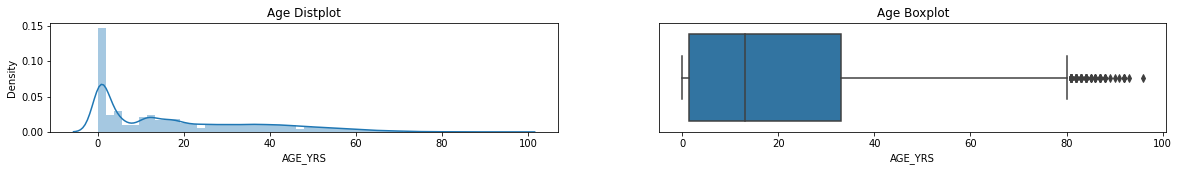

In [ ]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(vaers_hep['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(vaers_hep['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [ ]:
vaers_hep[vaers_hep['AGE_YRS'] <18]

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
6,27521,CA,0.50,0,Immediate rxn moderate erythema local swelling...,0,NaN,0,0,0.0,...,HEP,SMITHKLINE BEECHAM,HEP B (ENGERIX-B),Injection site oedema,Injection site reaction,Rash,NaN,NaN,0,0
28,27832,IN,4.00,1,Vax was given on SEP found to have antigenemia...,0,NaN,0,0,0.0,...,HEP,SMITHKLINE BEECHAM,HEP B (ENGERIX-B),Unevaluable event,NaN,NaN,NaN,NaN,0,0
506,30955,CO,2.00,0,MAY mom noted inc bruising given Ceclor for o...,0,NaN,0,1,2.0,...,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Otitis media,Pneumonia,Purpura,Pyrexia,Thrombocytopenia,1,1
561,31178,CA,2.00,0,Pt vaccinated w st nd dose of vax on JUN JUL r...,0,NaN,0,0,0.0,...,HEP,MERCK & CO. INC.,HEP B (FOREIGN),Unevaluable event,NaN,NaN,NaN,NaN,0,0
627,31415,AK,0.30,1,Pt vax w HIBV HEP DTP on FEB Vax w OPV MAR Pt ...,1,1991-05-26,0,1,12.0,...,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Drug ineffective,Infection,Meningitis,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105661,2059999,FR,3.00,1,abnormal coagulation Serum sickness like react...,0,NaN,0,1,0.0,...,HEP,UNKNOWN MANUFACTURER,HEP B (NO BRAND NAME),Coagulopathy,Extensive swelling of vaccinated limb,Injection site erythema,Injection site induration,Serum sickness-like reaction,1,0
105662,2065024,FR,0.33,0,Intussusception Initial information received o...,0,NaN,0,1,1.0,...,HEP,UNKNOWN MANUFACTURER,HEP B (NO BRAND NAME),Intussusception,Ultrasound scan,Vomiting,NaN,NaN,1,1
105665,2067401,FR,0.33,0,Intussusception Information has been received ...,0,NaN,0,1,2.0,...,HEP,UNKNOWN MANUFACTURER,HEP B (NO BRAND NAME),Intussusception,Poor feeding infant,Vomiting,NaN,NaN,1,1
105666,2067410,FR,0.17,1,Intussusception This is a spontaneous report r...,0,NaN,0,1,4.0,...,HEP,UNKNOWN MANUFACTURER,HEP B (NO BRAND NAME),Abdominal operation,Hypotonia,Intussusception,Large intestinal obstruction reduction,Procedure aborted,1,1


In [ ]:
vaers_hep[vaers_hep['AGE_YRS'] >90]

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
1798,25536,PA,92.0,1,Pt dev pain in arms legs which inc til unable ...,0,NaN,0,1,0.0,...,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Anorexia,Arthritis,Blood creatine phosphokinase increased,Chills,Confusional state,1,0
1799,25536,PA,92.0,1,Pt dev pain in arms legs which inc til unable ...,0,NaN,0,1,0.0,...,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Dehydration,Haematuria,Hepatic function abnormal,Myasthenic syndrome,Oedema,1,1
1800,25536,PA,92.0,1,Pt dev pain in arms legs which inc til unable ...,0,NaN,0,1,0.0,...,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Pain,Purpura,Pyrexia,Synovitis,Tremor,1,0
1801,25536,PA,92.0,1,Pt dev pain in arms legs which inc til unable ...,0,NaN,0,1,0.0,...,HEP,MERCK & CO. INC.,HEP B (RECOMBIVAX HB),Urinary incontinence,Urine analysis abnormal,NaN,NaN,NaN,1,0
36953,215089,PA,93.0,0,A nurse reported that a year old female tested...,0,NaN,0,0,0.0,...,HEP,GLAXOSMITHKLINE BIOLOGICALS,HEP B (ENGERIX-B),Drug ineffective,Laboratory test abnormal,NaN,NaN,NaN,0,0
88470,1580078,IL,96.0,0,st dose on April nd dose Aug This case was re...,0,NaN,0,0,0.0,...,HEPAB,GLAXOSMITHKLINE BIOLOGICALS,HEP A + HEP B (TWINRIX),Inappropriate schedule of product administration,NaN,NaN,NaN,NaN,0,0
88965,1845235,VA,91.0,2,Administered a Dose of Heplisav B that Underwe...,0,NaN,0,0,0.0,...,HEP,DYNAVAX TECHNOLOGIES CORPORATION,HEP B (HEPLISAV-B),No adverse event,Product storage error,NaN,NaN,NaN,0,0


In [ ]:
vaers_hep.drop(vaers_hep[(vaers_hep['SYMPTOM1'] == 'SARS-CoV-2 test negative')|
           (vaers_hep['SYMPTOM2'] == 'SARS-CoV-2 test negative')| 
           (vaers_hep['SYMPTOM3'] == 'SARS-CoV-2 test negative')| 
           (vaers_hep['SYMPTOM4'] == 'SARS-CoV-2 test negative')| 
           (vaers_hep['SYMPTOM5'] == 'SARS-CoV-2 test negative')].index, inplace=True)

In [ ]:
vaers_hep.drop(vaers_hep[(vaers_hep['SYMPTOM1'] == 'Bacterial test negative')|
           (vaers_hep['SYMPTOM2'] == 'Bacterial test negative')| 
           (vaers_hep['SYMPTOM3'] == 'Bacterial test negative')| 
           (vaers_hep['SYMPTOM4'] == 'Bacterial test negative')| 
           (vaers_hep['SYMPTOM5'] == 'Bacterial test negative')].index, inplace=True)



In [ ]:
vaers_hep.drop(vaers_hep[(vaers_hep['SYMPTOM1'] == 'Inappropriate schedule of product administration')|
           (vaers_hep['SYMPTOM2'] == 'Inappropriate schedule of product administration')| 
           (vaers_hep['SYMPTOM3'] == 'Inappropriate schedule of product administration')| 
           (vaers_hep['SYMPTOM4'] == 'Inappropriate schedule of product administration')| 
           (vaers_hep['SYMPTOM5'] == 'Inappropriate schedule of product administration')].index, inplace=True)

In [ ]:
vaers_hep.drop(vaers_hep[(vaers_hep['SYMPTOM1'] == 'Unevaluable event')|
           (vaers_hep['SYMPTOM2'] == 'Unevaluable event')| 
           (vaers_hep['SYMPTOM3'] == 'Unevaluable event')| 
           (vaers_hep['SYMPTOM4'] == 'Unevaluable event')| 
           (vaers_hep['SYMPTOM5'] == 'Unevaluable event')].index, inplace=True)

In [ ]:
vaers_hep.drop(vaers_hep[(vaers_hep['SYMPTOM1'] == 'No adverse event')|
           (vaers_hep['SYMPTOM2'] == 'No adverse event')| 
           (vaers_hep['SYMPTOM3'] == 'No adverse event')| 
           (vaers_hep['SYMPTOM4'] == 'No adverse event')| 
           (vaers_hep['SYMPTOM5'] == 'No adverse event')].index, inplace=True)

In [ ]:
vaers_hep.drop(vaers_hep[(vaers_hep['SYMPTOM1'] == 'Product storage error')|
           (vaers_hep['SYMPTOM2'] == 'Product storage error')| 
           (vaers_hep['SYMPTOM3'] == 'Product storage error')| 
           (vaers_hep['SYMPTOM4'] == 'Product storage error')| 
           (vaers_hep['SYMPTOM5'] == 'Product storage error')].index, inplace=True)

In [ ]:
df = vaers_hep

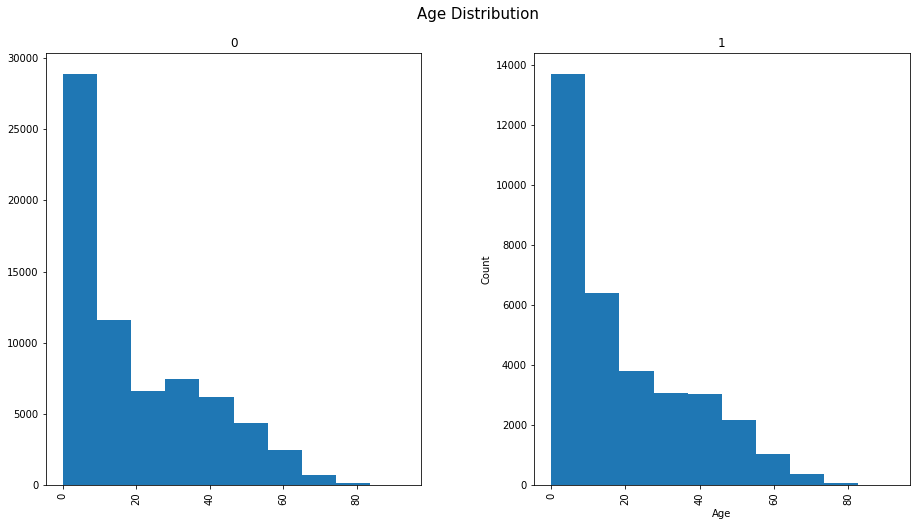

In [ ]:
# Distribution of adverse event severity based on age
df['AGE_YRS'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);


In [ ]:

plt.figure(figsize=(15,8))
labels = df['VAX_MANU'].value_counts().index
values = df['VAX_MANU'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,marker_colors = [
                      'rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)'])])
fig.show()

<Figure size 1080x576 with 0 Axes>

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df['VAX_MANU'].value_counts().index
values1 = df[df['serious'] == 1].VAX_MANU.value_counts().values
values2 = df[df['serious'] == 0].VAX_MANU.value_counts().values
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= values1, name="Serious case",marker_colors = [ 'rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)',
                                                                                          'rgb(135, 197, 95)', 'rgb(158, 185, 243)']),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Non Serious case",marker_colors = [ 'rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)',
                                                                                             'rgb(135, 197, 95)', 'rgb(158, 185, 243)']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seriousness of Vaccine Manufacturer",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Serious', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non Serious', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [ ]:
## As unknown manufacturer are negligible 
df = df[~df['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

([<matplotlib.axis.XTick at 0x7f2f18c70750>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male'), Text(0, 0, 'Unknown')])

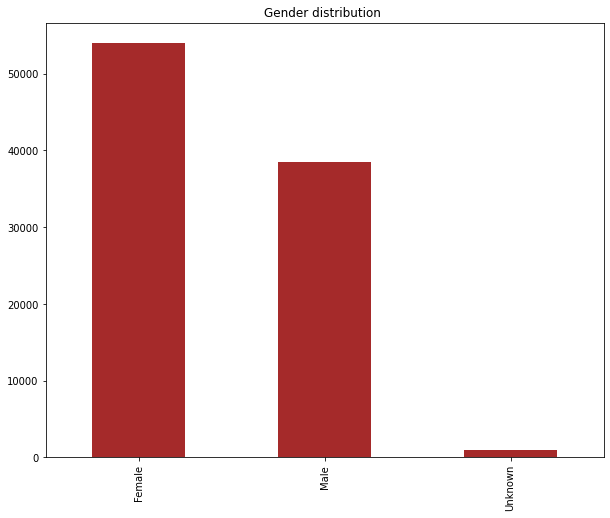

In [ ]:
plt.figure(figsize=(10,8))
route = df['SEX'].value_counts()
route.plot(kind='bar', title='Gender distribution ',color="brown")
values = ['Female', 'Male', 'Unknown'] 
plt.xticks(route.index,values)

In [ ]:
gender_serious = (df.groupby(['SEX', 'serious']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

In [ ]:
map_dict = {1: "Male", 0 : "Female", 2 :"Unknown"}
map_dict_s = {1: "Serious", 0 : "Non Serious"}
gender_serious["SEX"] = gender_serious["SEX"].map(map_dict)
gender_serious["serious"] = gender_serious["serious"].map(map_dict_s)

In [ ]:
import plotly.express as px


fig = px.bar(gender_serious, x="SEX", y="count", color="serious", title="Gender seriousness comparison",text_auto=True,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    template="presentation",
    xaxis=dict(title_text="Gender"),
    yaxis=dict(title_text="count")
)
fig.show()

In [ ]:
# drop all rows with unkown SEX
df = df[df['SEX'] != 2]

In [ ]:
age_serious = df[['AGE_YRS', 'serious']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}

age_serious["serious"] = age_serious["serious"].map(map_dict_s)


In [ ]:
bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(age_serious['AGE_YRS'], bins, labels=group)

age_serious['category'] = categories

In [ ]:
age_serious_group = (age_serious.groupby(['category', 'serious']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

In [ ]:
fig = px.bar(age_serious_group, x="category", y="count", color="serious", text_auto=True,color_discrete_sequence=px.colors.qualitative.Pastel,
             title="Age Category and seriousness comparison")
fig.update_layout(
    template="presentation",
    xaxis=dict(title_text="Age Category"),
    yaxis=dict(title_text="Count")
)
fig.show()

In [ ]:
age_serious_sex = df[['AGE_YRS','SEX', 'serious']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
map_dict = {1: "Male", 0 : "Female"}
age_serious_sex["serious"] = age_serious_sex["serious"].map(map_dict_s)
age_serious_sex["SEX"] = age_serious_sex["SEX"].map(map_dict)

bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(age_serious_sex['AGE_YRS'], bins, labels=group)

age_serious_sex['category'] = categories

In [ ]:
age_serious_sex1 = (age_serious_sex.groupby(['category','SEX', 'serious']).size()  
   .reset_index(name='count'))

In [ ]:
#https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460
fig = go.Figure()

fig.update_layout(
    template="presentation",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender",
    barmode="stack",
)

colors = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)']
for r, c in zip(age_serious_sex1.serious.unique(), colors):
    plot_df = age_serious_sex1[age_serious_sex1.serious == r]
    fig.add_trace(
        go.Bar(x=[plot_df.category, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [ ]:
subset_df = df[['AGE_YRS','SEX','DIED','VAX_MANU']]
map_dict_d = {1: "Death", 0 : "No Death"}
map_dict = {1: "Male", 0 : "Female"}
subset_df["SEX"] = subset_df["SEX"].map(map_dict)
subset_df["DIED"] = subset_df["DIED"].map(map_dict_d)

bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(subset_df['AGE_YRS'], bins, labels=group)

subset_df['category'] = categories
subset_df

,AGE_YRS,SEX,DIED,VAX_MANU,category
0,33.0,Female,No Death,MERCK & CO. INC.,31-40
1,33.0,Female,No Death,MERCK & CO. INC.,31-40
2,22.0,Male,No Death,MERCK & CO. INC.,21-30
3,22.0,Male,No Death,MERCK & CO. INC.,21-30
4,65.0,Female,No Death,MERCK & CO. INC.,61-70
...,...,...,...,...,...
105653,8.0,Male,No Death,GLAXOSMITHKLINE BIOLOGICALS,NaN
105659,15.0,Male,No Death,GLAXOSMITHKLINE BIOLOGICALS,< 20
105660,15.0,Male,No Death,GLAXOSMITHKLINE BIOLOGICALS,< 20
105663,30.0,Male,No Death,GLAXOSMITHKLINE BIOLOGICALS,21-30


In [ ]:
subset_df1 = (subset_df.groupby(['category','SEX', 'DIED']).size()  
   .reset_index(name='count'))

In [ ]:
#https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460
fig = go.Figure()

fig.update_layout(
    template="presentation",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender Vs Death/No Death",
    barmode="stack",
)

colors = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)']
for r, c in zip(subset_df1.DIED.unique(), colors):
    plot_df = subset_df1[subset_df1.DIED == r]
    fig.add_trace(
        go.Bar(x=[plot_df.category, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [ ]:
sub = subset_df[(subset_df["DIED"] == 'Death')]

In [ ]:
sub = (sub.groupby(['DIED','VAX_MANU']).size()  
   .reset_index(name='count'))

In [ ]:
sub1 =(df.groupby(['VAX_MANU']).size()  
   .reset_index(name='count'))

In [ ]:
sub1 = sub1.rename(columns={"count":"totalcount"})

In [ ]:
sub1= sub1.merge(sub, on = 'VAX_MANU')
sub1.drop('DIED',axis=1,inplace=True)

In [ ]:
 sub1['Percentage'] = sub1['count'].div(sub1['totalcount']).round(4)*100

In [ ]:
subset_death = df[(df["DIED"] == 1)]

In [ ]:
subset_death = subset_death[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

In [ ]:
subset_death['Symptoms'] = subset_death[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_symp['Symptoms'] = df_symp['SYMPTOM1'] + "," +  df_symp['SYMPTOM2'] + "," +  df_symp['SYMPTOM3'] + "," +  df_symp['SYMPTOM4'] + "," +  df_symp['SYMPTOM5']
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

In [ ]:
subset_death

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
627,31415,Drug ineffective,Infection,Meningitis,NaN,NaN,"Drug ineffective,Infection,Meningitis"
633,31738,Bradycardia,CSF test abnormal,Condition aggravated,Drug ineffective,Hypotension,"Bradycardia,CSF test abnormal,Condition aggrav..."
634,31738,Infection,Pneumonia,Pyrexia,NaN,NaN,"Infection,Pneumonia,Pyrexia"
1415,37777,Ascites,Coagulopathy,Coma,Hepatic failure,Hepatic necrosis,"Ascites,Coagulopathy,Coma,Hepatic failure,Hepa..."
1416,37777,Hepatitis,Infection,Intracranial pressure increased,NaN,NaN,"Hepatitis,Infection,Intracranial pressure incr..."
...,...,...,...,...,...,...,...
105228,1000475,Sudden death,NaN,NaN,NaN,NaN,Sudden death
105305,1062293,Colorectal cancer,Colorectal cancer stage IV,Death,Dyspepsia,Gastrooesophageal reflux disease,"Colorectal cancer,Colorectal cancer stage IV,D..."
105306,1062293,Hepatitis B surface antibody negative,Prophylaxis,NaN,NaN,NaN,"Hepatitis B surface antibody negative,Prophylaxis"
105309,1065233,Prophylaxis,Renal cancer,NaN,NaN,NaN,"Prophylaxis,Renal cancer"


In [ ]:
subset_death = subset_death.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})
df_covid_all_sym = subset_death.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()
df_covid_sym_id = df_covid_all_sym.assign(Symptoms=df_covid_all_sym.Symptoms.str.split(','))
df_covid_sym1 = df_covid_sym_id.explode('Symptoms')

In [ ]:
df_covid_sym1

,VAERS_ID,Symptoms
0,25520,Sepsis
1,26236,Hepatic failure
1,26236,Pulmonary oedema
1,26236,Sepsis
2,31415,Drug ineffective
...,...,...
823,2018725,Death
823,2018725,Immunisation
823,2018725,Off label use
823,2018725,Product use issue


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

(-0.5, 1673.5, 219.5, -0.5)

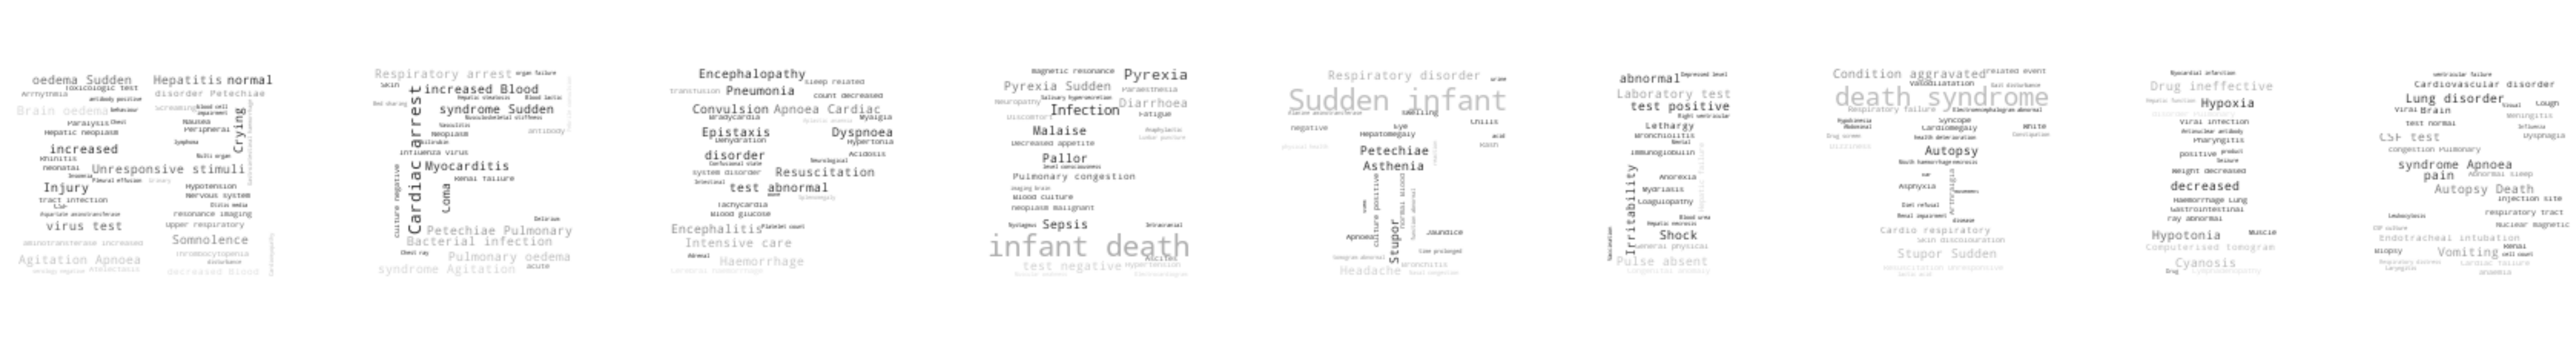

In [ ]:

# Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("/content/drive/Shareddrives/Team A 606 Capstone Project/My project (3) hep.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(df_covid_all_sym.Symptoms))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[100,100])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

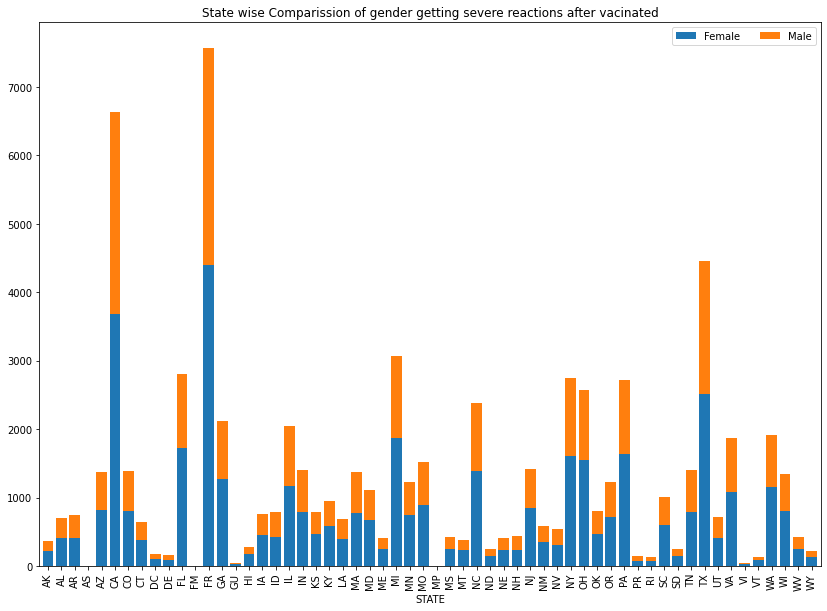

In [ ]:
StateAnalysis = df[['VAERS_ID','STATE','VAX_MANU','SEX','AGE_YRS','DIED','RECOVD','serious']].drop_duplicates()
StateAnalysis = StateAnalysis[StateAnalysis['STATE'] != '']
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SEX).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['Female', 'Male'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of gender getting severe reactions after vacinated', loc ='center')
plt.show()

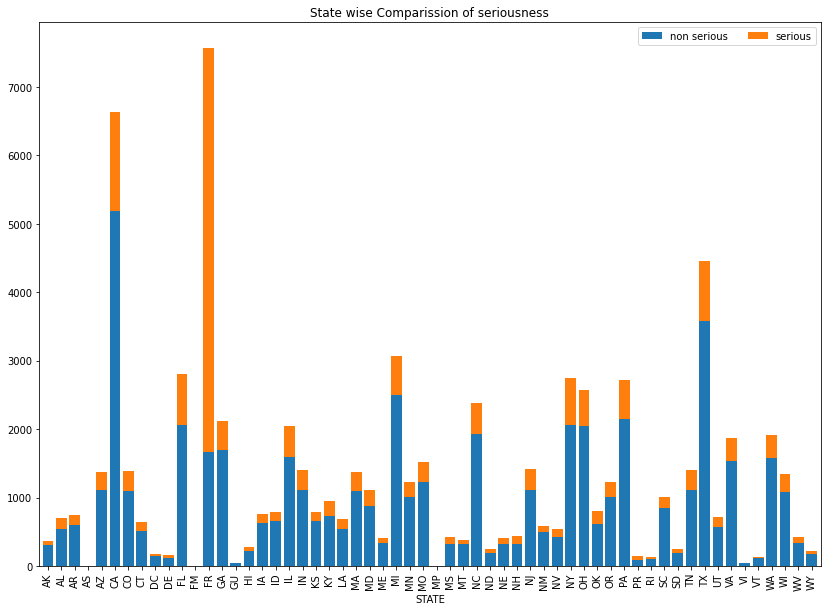

In [ ]:
pd.crosstab(StateAnalysis.STATE,StateAnalysis.serious).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['non serious', 'serious'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of seriousness', loc ='center')
plt.show()

In [ ]:
df_covid_allergies = df.filter(['VAERS_ID','ALLERGIES','serious'], axis=1)
df_covid_allergies.head()

,VAERS_ID,ALLERGIES,serious
0,27294,NaN,0
1,27331,NaN,0
2,27348,NaN,1
3,27348,NaN,1
4,27427,NaN,0


In [ ]:
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].astype(str)

# Remove punctuation
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: x.split())
df_covid_allergies.head()

,VAERS_ID,ALLERGIES,serious
0,27294,[nan],0
1,27331,[nan],0
2,27348,[nan],1
3,27348,[nan],1
4,27427,[nan],0


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
df_covid_allergies.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,VAERS_ID,ALLERGIES,serious
0,27294,[nan],0
1,27331,[nan],0
2,27348,[nan],1
3,27348,[nan],1
4,27427,[nan],0


In [ ]:
# Unpack lists with Pandas

df_covid_allergies = df_covid_allergies.explode('ALLERGIES', ignore_index=True)

df_covid_allergies.head(10)

,VAERS_ID,ALLERGIES,serious
0,27294,nan,0
1,27331,nan,0
2,27348,nan,1
3,27348,nan,1
4,27427,nan,0
5,27494,nan,0
6,27521,nan,0
7,27527,nan,1
8,27551,nan,1
9,27553,nan,1


In [ ]:
# Get the frequency of allergies
df_covid_allergies['ALLERGIES'].value_counts(ascending = False)

nan           85474
none           2871
allergi         768
known           702
nkda            662
              ...  
maximu            1
gluteal           1
im                1
lincomycin        1
haldol            1
Name: ALLERGIES, Length: 1209, dtype: int64

In [ ]:
# Only kepp allergies that are in more than 1000 patients
allergies_count = df_covid_allergies.ALLERGIES.value_counts()
df_covid_allergies = df_covid_allergies[df_covid_allergies.ALLERGIES.isin(allergies_count.index[allergies_count.gt(100)])]
df_covid_allergies['ALLERGIES'].value_counts(ascending = False)

nan            85474
none            2871
allergi          768
known            702
nkda             662
nka              524
penicillin       287
sulfa            211
amoxicillin      167
unknown          124
egg              124
food             118
report           118
latex            116
vaccin           111
rash             103
Name: ALLERGIES, dtype: int64

In [ ]:
# Drop rows with "nan","none","allergi","food","known","unknown","reaction","na","report", "medic"

df_covid_allergies = df_covid_allergies.drop(df_covid_allergies[df_covid_allergies.ALLERGIES.isin(["nan","past","updat","allerg",
                                                                                                   "none","comment","document","drug",
                                                                                                   "vaccin","nka","nkda","allergi","food",
                                                                                                   "known","unknown","reaction","na","report", 
                                                                                                   "medic","n","see","pcn"])].index)
df_covid_allergies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 70039 to 97880
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VAERS_ID   1008 non-null   int64 
 1   ALLERGIES  1008 non-null   object
 2   serious    1008 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ KB


In [ ]:
S_ALLERGIES  = df_covid_allergies[df_covid_allergies['serious']== 1]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))

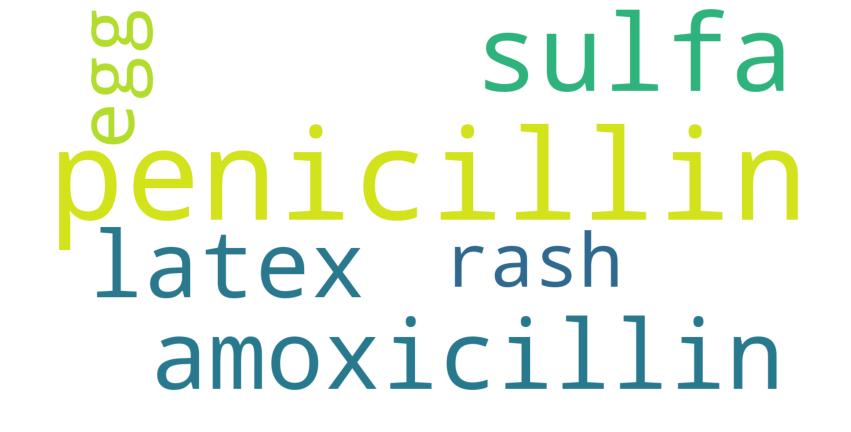

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
NS_ALLERGIES  = df_covid_allergies[df_covid_allergies['serious']== 0]
wordcloud3 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(NS_ALLERGIES.ALLERGIES))

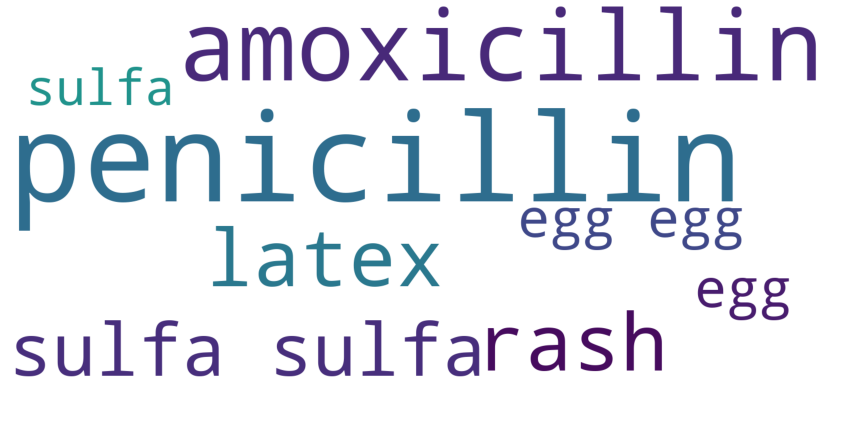

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
df_ML = df.copy()

In [ ]:
df_ML.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92390 entries, 0 to 105664
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      92390 non-null  int64  
 1   STATE         90781 non-null  object 
 2   AGE_YRS       92390 non-null  float64
 3   SEX           92390 non-null  int64  
 4   SYMPTOM_TEXT  92390 non-null  object 
 5   DIED          92390 non-null  int64  
 6   DATEDIED      1110 non-null   object 
 7   L_THREAT      92390 non-null  int64  
 8   HOSPITAL      92390 non-null  int64  
 9   HOSPDAYS      92390 non-null  float64
 10  X_STAY        92390 non-null  int64  
 11  DISABLE       92390 non-null  int64  
 12  RECOVD        92390 non-null  int64  
 13  VAX_DATE      92390 non-null  object 
 14  ONSET_DATE    92390 non-null  object 
 15  NUMDAYS       92390 non-null  int64  
 16  OTHER_MEDS    55392 non-null  object 
 17  CUR_ILL       66434 non-null  object 
 18  HISTORY       68624 non-n

In [ ]:
df_knn_ML = df_ML.drop(['STATE','DATEDIED','X_STAY','VAX_DATE','ONSET_DATE','NUMDAYS',
            'ER_ED_VISIT','VAX_TYPE','VAX_NAME','ime'],axis=1)

In [ ]:
df_ML.drop(['VAERS_ID','STATE','DATEDIED','X_STAY','VAX_DATE','ONSET_DATE','NUMDAYS',
            'ER_ED_VISIT','VAX_TYPE','VAX_NAME','ime'
],axis=1,inplace=True)

In [ ]:
df_ML

,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,OTHER_MEDS,...,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_MANU,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious
0,33.0,0,Pt vaccinated with Recombivax developed nausea...,0,0,0,0.0,0,1,Ansaid Vit B,...,h o of asthma treatment for OL drug use yr ago,0,NaN,MERCK & CO. INC.,Chest pain,Diarrhoea,Dyspnoea,Nausea,Palpitations,0
1,33.0,0,Pt vaccinated with Recombivax HB experienced a...,0,0,0,0.0,0,2,Dilantin Tegretol,...,Hx of Epilepsy,0,NaN,MERCK & CO. INC.,Convulsion,NaN,NaN,NaN,NaN,0
2,22.0,1,Pt w G PD vaccinated w Recombivax HB Developed...,0,0,1,0.0,0,2,NaN,...,G pd deficiency,0,NaN,MERCK & CO. INC.,Diarrhoea,Hepatic function abnormal,Hepatitis,Nausea,Pyrexia,1
3,22.0,1,Pt w G PD vaccinated w Recombivax HB Developed...,0,0,1,0.0,0,2,NaN,...,G pd deficiency,0,NaN,MERCK & CO. INC.,Vomiting,NaN,NaN,NaN,NaN,1
4,65.0,0,Pt vaccinated with Recombivax developed weepin...,0,0,0,0.0,0,2,NaN,...,Allergies Pencillin Codeine Morphine,0,NaN,MERCK & CO. INC.,Pruritus,Rash,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105653,8.0,1,Hepatitis A infection This case was reported b...,0,0,0,0.0,0,0,NaN,...,NaN,0,NaN,GLAXOSMITHKLINE BIOLOGICALS,Liver function test,Lymphadenopathy,Protein total normal,Splenomegaly,Ultrasound abdomen abnormal,0
105659,15.0,1,angioedema Injection site reaction Fatigue Flu...,0,0,1,0.0,0,2,ZYRTEC CETIRIZINE HYDROCHLORIDE,...,NaN,0,NaN,GLAXOSMITHKLINE BIOLOGICALS,Allergy to vaccine,Angioedema,Fatigue,Flushing,Hypersensitivity,1
105660,15.0,1,angioedema Injection site reaction Fatigue Flu...,0,0,1,0.0,0,2,ZYRTEC CETIRIZINE HYDROCHLORIDE,...,NaN,0,NaN,GLAXOSMITHKLINE BIOLOGICALS,Injection site reaction,NaN,NaN,NaN,NaN,1
105663,30.0,1,ADEM with severe midbrain damage ICD G ICD G I...,0,1,1,0.0,0,0,NaN,...,NaN,0,NaN,GLAXOSMITHKLINE BIOLOGICALS,Acute disseminated encephalomyelitis,Brain injury,CSF test,Computerised tomogram head,Electrocardiogram,1


In [ ]:
df_ML.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/hep_ml.csv', index=False)

In [ ]:
df_knn_ML.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/hep_knn_ml.csv', index=False)